# Лабораторна робота № 3

## Виконала Денисенко Анастасія, ФІ-21

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
im = cv2.imread('im.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

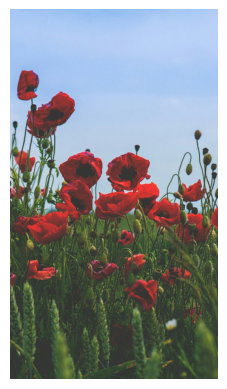

In [3]:
plt.imshow(im)
plt.axis("off")
plt.show()

### Інвертування інтенсивності

In [4]:
def invert(im):
    inverted = im.copy()
    inverted_hsv = cv2.cvtColor(inverted, cv2.COLOR_RGB2HSV)
    inverted_hsv[:, :, 1] = 255 - inverted_hsv[:, :, 1]
    inverted_rgb = cv2.cvtColor(inverted_hsv, cv2.COLOR_HSV2RGB)
    return inverted_rgb

In [5]:
inverted = invert(im)

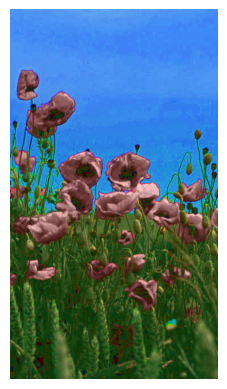

In [6]:
plt.imshow(inverted)
plt.axis("off")
plt.show()

### Додавання вибраного значення до значень в вибраному каналі

In [7]:
def add_to_color_channel(im, channel, value_to_add):
    red, green, blue = cv2.split(im)
    
    if channel == 'r':
        red = np.clip(red + value_to_add, 0, 255).astype(np.uint8)
    elif channel == 'g':
        green = np.clip(green + value_to_add, 0, 255).astype(np.uint8)
    elif channel == 'b':
        blue = np.clip(blue + value_to_add, 0, 255).astype(np.uint8)
    else:
        raise ValueError("Channel must be 'r', 'g' or 'b'")
        
    output = cv2.merge([red, green, blue])
    return output

In [8]:
im2 = add_to_color_channel(im, 'g', 20)

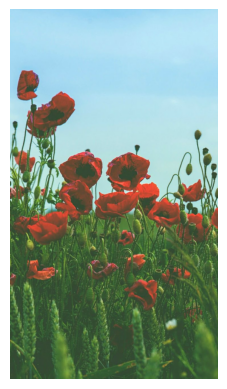

In [9]:
plt.imshow(im2)
plt.axis("off")
plt.show()

### Розділення колірних каналів

In [10]:
def color_channels_sep(im):
    red, green, blue = cv2.split(im)
    zeros = np.zeros_like(red)
    r = cv2.merge([red, zeros, zeros])
    g = cv2.merge([zeros, green, zeros])
    b = cv2.merge([zeros, zeros, blue])
    return r, g, b

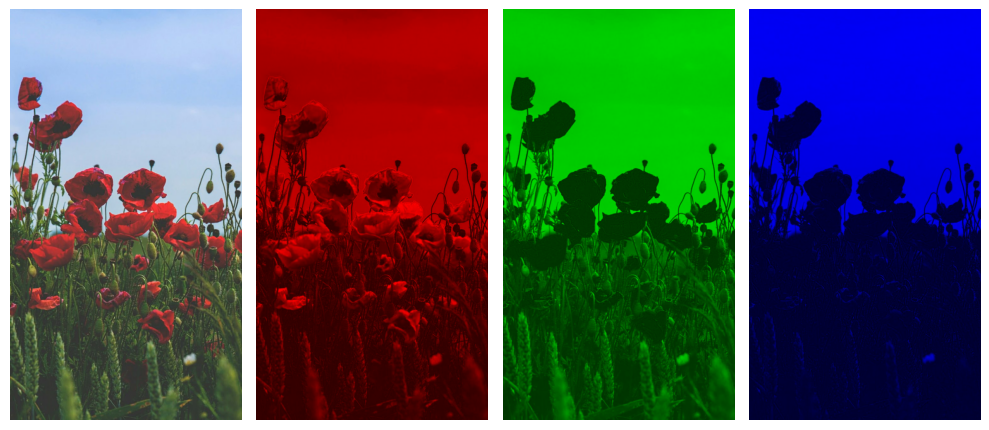

In [11]:
r, g, b = color_channels_sep(im)

plt.figure(figsize=(10, 6))

plt.subplot(1, 4, 1)
plt.imshow(im)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(r)
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(g)
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(b)
plt.axis("off")

plt.tight_layout()
plt.show()

### Змішання двох зображень з вибраним коефіцієнтом

In [12]:
def combine_two(im1, im2, alpha):
    im2 = cv2.resize(im2, (im1.shape[1], im1.shape[0]))
    blended = cv2.addWeighted(im1, alpha, im2, 1 - alpha, 0)
    return blended

In [13]:
sky = cv2.imread('sky.jpg')
sky = cv2.cvtColor(sky, cv2.COLOR_BGR2RGB)
flamingos = cv2.imread('flamingos.jpg')
flamingos = cv2.cvtColor(flamingos, cv2.COLOR_BGR2RGB)

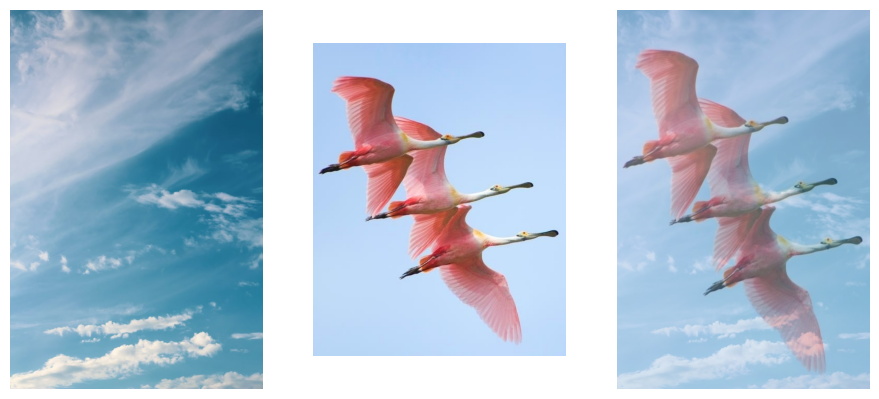

In [14]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.imshow(sky)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(flamingos)
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(combine_two(sky, flamingos, 0.4))
plt.axis("off")

plt.show()

### Застосування фільтру з заданою матрицею (згортка)

In [15]:
def apply_filter(im, kernel):
    H, W, C = im.shape
    kH, kW = kernel.shape
    pad_h = kH // 2
    pad_w = kW // 2
    
    padded = np.pad(im, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='reflect')

    result = np.zeros((H, W, C), dtype=np.float32)

    for c in range(C):
        for i in range(H):
            for j in range(W):
                region = padded[i : i+kH, j : j+kW, c]
                value = np.sum(region * kernel)
                result[i, j, c] = value

    result = np.clip(result, 0, 255).astype(im.dtype)
    return result

### Гаусове розмиття

In [16]:
blur = np.array([[0.000789, 0.006581, 0.013347, 0.006581, 0.000789], 
        [0.006581, 0.054901, 0.111345, 0.054901, 0.006581], 
        [0.013347, 0.111345, 0.225821, 0.111345, 0.013347], 
        [0.006581, 0.054901, 0.111345, 0.054901, 0.006581], 
        [0.000789, 0.006581, 0.013347, 0.006581, 0.000789]])

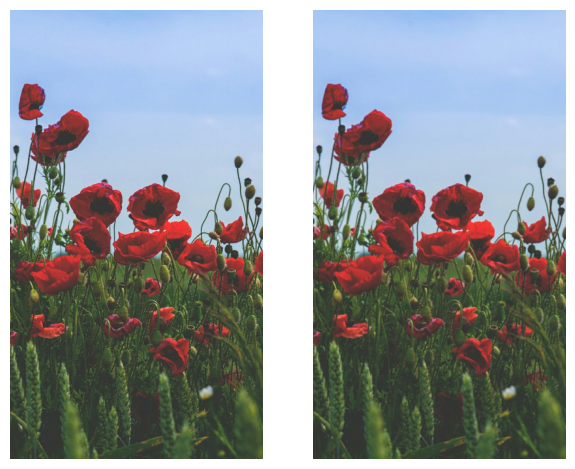

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.imshow(im)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(apply_filter(im, blur))
plt.axis("off")

plt.show()

### Різниця між не розмитим та розмитим зображеннями

In [18]:
def difference(im):
    result = np.clip((im - apply_filter(im, blur)), 0, 255)
    return result

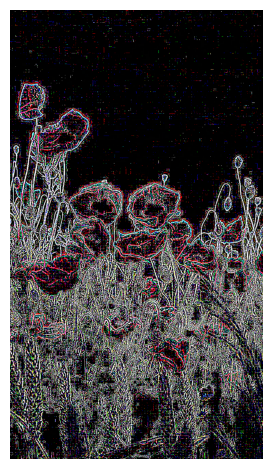

In [19]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.imshow(difference(im))
plt.axis("off")

plt.show()

### Покращення точності згорткою

In [20]:
resolution = np.array([[-1, -1, -1], 
                       [-1, 9, -1], 
                       [-1, -1, -1]])

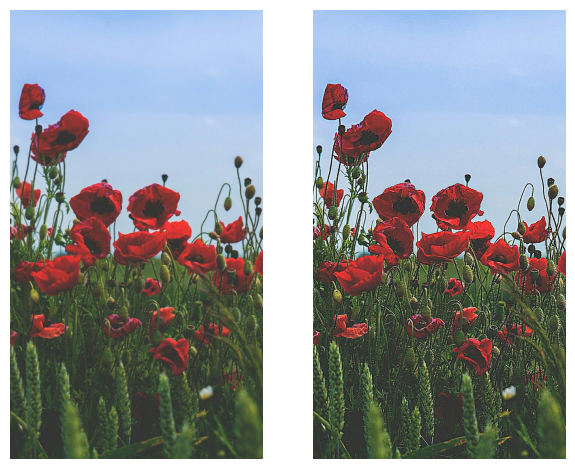

In [21]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.imshow(im)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(apply_filter(im, resolution))
plt.axis("off")

plt.show()

### Медіанний фільтр

In [22]:
def median_filter(im, kernel_size):
    H, W, C = im.shape
    kH, kW = kernel_size[0], kernel_size[1]
    pad_h = kH // 2
    pad_w = kW // 2
    
    padded = np.pad(im, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='reflect')

    result = np.zeros((H, W, C), dtype=np.float32)

    for c in range(C):
        for i in range(H):
            for j in range(W):
                region = padded[i : i+kH, j : j+kW, c]
                value = np.median(region.flatten())
                result[i, j, c] = value

    result = np.clip(result, 0, 255).astype(im.dtype)
    return result

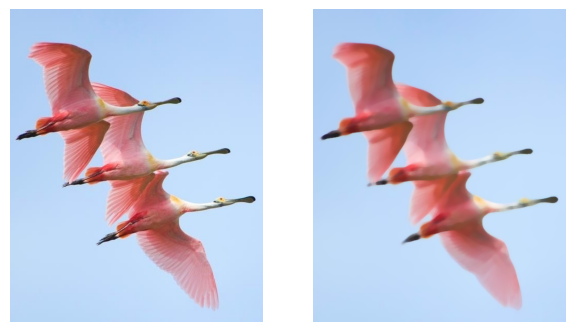

In [23]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.imshow(flamingos)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(median_filter(flamingos, [10, 10]))
plt.axis("off")

plt.show()

### Фільтр ерозії

In [24]:
def erode(im, ksize=3):
    H, W, C = im.shape
    pad = ksize // 2
    padded = np.pad(im, ((pad, pad), (pad, pad), (0, 0)), mode='edge')
    result = np.zeros_like(im)

    for c in range(C):
        for i in range(H):
            for j in range(W):
                region = padded[i:i+ksize, j:j+ksize, c]
                result[i, j, c] = np.min(region)
    return result

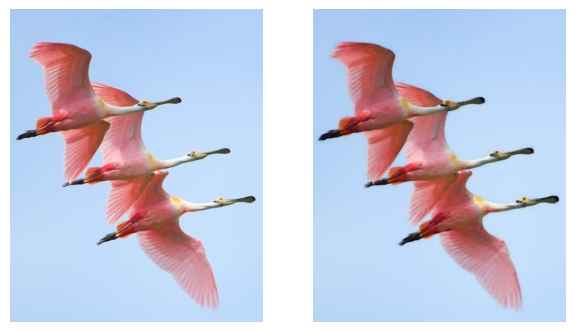

In [25]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.imshow(flamingos)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(erode(flamingos))
plt.axis("off")

plt.show()

### Фільтр нарощування

In [26]:
def dilate(im, ksize=3):
    H, W, C = im.shape
    pad = ksize // 2
    padded = np.pad(im, ((pad, pad), (pad, pad), (0, 0)), mode='edge')
    result = np.zeros_like(im)

    for c in range(C):
        for i in range(H):
            for j in range(W):
                region = padded[i:i+ksize, j:j+ksize, c]
                result[i, j, c] = np.max(region)
    return result

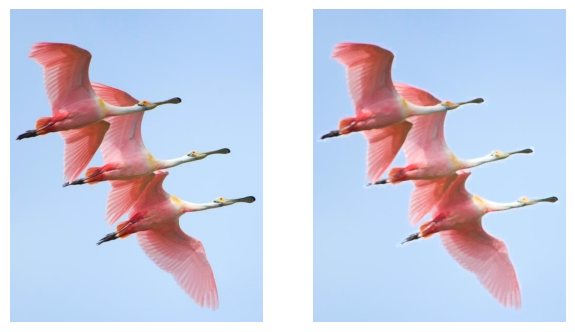

In [27]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.imshow(flamingos)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(dilate(flamingos))
plt.axis("off")

plt.show()

### Фільтр Собеля

In [28]:
def sobel_filter(im):
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    H, W = gray.shape
    padded = np.pad(gray, ((1, 1), (1, 1)), mode='edge')
    Gx = np.zeros((H, W), dtype=np.float32)
    Gy = np.zeros((H, W), dtype=np.float32)
    G  = np.zeros((H, W), dtype=np.float32)
    Kx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1],
               [0,  0,  0],
               [1,  2,  1]])
    for i in range(H):
        for j in range(W):
            region = padded[i : i+3, j : j+3]
            value_x = np.sum(region * Kx)
            value_y = np.sum(region * Ky)
            Gx[i, j] = value_x
            Gy[i, j] = value_y
            G[i, j] = np.sqrt(value_x**2 + value_y**2)
    G = np.uint8(G / G.max() * 255)
    return G

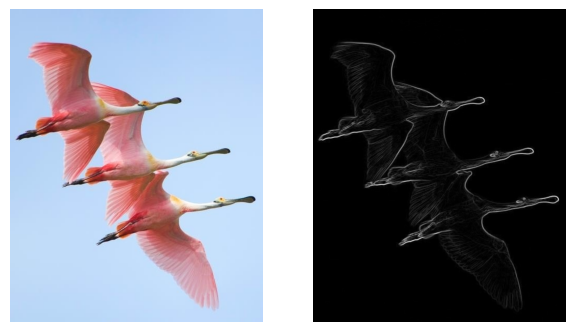

In [29]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.imshow(flamingos)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(sobel_filter(flamingos), cmap='gray')
plt.axis("off")

plt.show()

### Стеганографія (методом найменш значущого біта, вписуємо в 8-бітну площину)

In [30]:
def steganography(im, mark, channel):
    mark = cv2.resize(mark, (im.shape[1], im.shape[0]))
    _, mark = cv2.threshold(cv2.cvtColor(mark, cv2.COLOR_BGR2GRAY), 180, 255, cv2.THRESH_BINARY)
    mark = mark // 255
    r, g, b = cv2.split(im)
    
    if channel == 'r':
        binary = [[np.binary_repr(i, width=8) for i in val] for val in r]
    elif channel == 'g':
        binary = [[np.binary_repr(i, width=8) for i in val] for val in g]
    elif channel == 'b':
        binary = [[np.binary_repr(i, width=8) for i in val] for val in b]
    else:
        raise ValueError('Channel has to be r, g or b.') 
        
    for i in range(len(binary)):
        for j in range(len(binary[0])):
            binary[i][j] = int((binary[i][j][:7] + str(mark[i][j])), 2)
            
    binary = np.array(binary, dtype=np.uint8)
            
    if channel == 'r':
        output = cv2.merge([binary, g, b])
    elif channel == 'g':
        output = cv2.merge([r, binary, b])
    else:
        output = cv2.merge([r, g, binary])
    return output, mark

In [31]:
bunny = cv2.imread('bunny.jpg')
bunny = cv2.cvtColor(bunny, cv2.COLOR_BGR2RGB)
watermark = cv2.imread('watermark.png')
watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB)

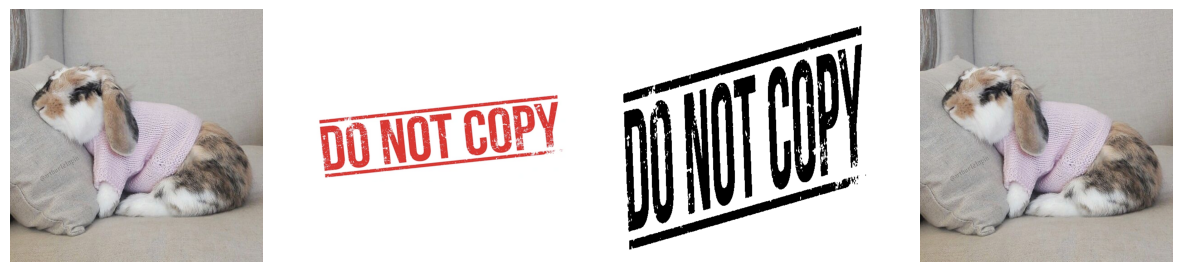

In [32]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.imshow(bunny)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(watermark)
plt.axis("off")

result, binary = steganography(bunny, watermark, 'b')

plt.subplot(1, 4, 3)
plt.imshow(binary, cmap = 'gray')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(result)
plt.axis("off")

plt.show()